# Proyek Analisis Data: [E-Commerce Public Dataset]
- **Nama:** Fitria Irfani Mutashim
- **Email:** fitriairfani23@gmail.com
- **ID Dicoding:** MC008D5X1800

## Menentukan Pertanyaan Bisnis

- Produk apakah yang sering dibeli?
- Berapa besar rata-rata transaksi yang dilakukan oleh setiap customer dalam sekali belanja?
- Metode payment apakah yang biasanya digunakan oleh customer?
- Produk apakah yang biasanya dibeli secara bersamaan?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MultiLabelBinarizer
import mlxtend as ml
# from scipy import sparse
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

## Data Wrangling

### Gathering Data

In [2]:
customers_dataset = pd.read_csv("/content/customers_dataset.csv")
geolocation_dataset = pd.read_csv("/content/geolocation_dataset.csv")
order_items_dataset = pd.read_csv("/content/order_items_dataset.csv")
order_payments_dataset = pd.read_csv("/content/order_payments_dataset.csv")
orders_dataset = pd.read_csv("/content/orders_dataset.csv")
product_category_name_translation = pd.read_csv("/content/product_category_name_translation.csv")
products_dataset = pd.read_csv("/content/products_dataset.csv")
sellers_dataset = pd.read_csv("/content/sellers_dataset.csv")

In [ ]:
customers_dataset.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [ ]:
geolocation_dataset.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [ ]:
order_items_dataset.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [ ]:
order_payments_dataset.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [ ]:
orders_dataset.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [ ]:
product_category_name_translation.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [ ]:
products_dataset.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [ ]:
sellers_dataset.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [3]:
customers_dataset.info()
geolocation_dataset.info()
order_items_dataset.info()
order_payments_dataset.info()
orders_dataset.info()
product_category_name_translation.info()
products_dataset.info()
sellers_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  

Menyatukan data product_category_name_translation dengan products_dataset dengan tujuan untuk mengambil nama produk dalam bahasa inggris.

In [4]:
new_product = pd.merge(
    left=product_category_name_translation,
    right=products_dataset,
    how="inner",
    on="product_category_name"
)
new_product.drop("product_category_name", axis=1, inplace=True)
new_product

,product_category_name_english,product_id,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,health_beauty,e3e020af31d4d89d2602272b315c3f6e,58.0,1987.0,3.0,75.0,21.0,7.0,13.0
1,health_beauty,c5d8079278e912d7e3b6beb48ecb56e8,60.0,330.0,1.0,1300.0,19.0,28.0,17.0
2,health_beauty,36555a2f528d7b2a255c504191445d39,51.0,1069.0,1.0,1467.0,23.0,16.0,20.0
3,health_beauty,e586ebb6022265ae1eea38f46ffe3ead,40.0,1469.0,3.0,1050.0,18.0,21.0,27.0
4,health_beauty,75b4372e69a42f8ae1d908c076f547b2,22.0,1313.0,1.0,938.0,29.0,22.0,23.0
...,...,...,...,...,...,...,...,...,...
32323,fashion_childrens_clothes,2b18330ce86ae5c606250b75b499f370,42.0,277.0,3.0,120.0,19.0,11.0,15.0
32324,fashion_childrens_clothes,28ac6af4008a402e5039f3e042a36e13,48.0,488.0,5.0,500.0,36.0,10.0,26.0
32325,fashion_childrens_clothes,57bdf3098169cccdb62221bd3e089cbd,38.0,168.0,1.0,100.0,16.0,16.0,16.0
32326,security_and_services,8db75af9aed3315374db44d7860e25da,48.0,461.0,4.0,400.0,26.0,22.0,11.0


Menggabungkan data orders_dataset dengan order_payments_dataset berdasarkan order_id.

In [5]:
new_order = pd.merge(
    left=orders_dataset,
    right=order_payments_dataset,
    how="inner",
    on="order_id"
)
new_order

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,credit_card,1,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,3,voucher,1,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,2,voucher,1,18.59
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1,boleto,1,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1,credit_card,3,179.12
...,...,...,...,...,...,...,...,...,...,...,...,...
103881,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00,1,credit_card,3,85.08
103882,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,1,credit_card,3,195.00
103883,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00,1,credit_card,5,271.01
103884,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,1,credit_card,4,441.16


Menggabungkan data order_items_dataset dengan new_order berdasarkan order_id.

In [6]:
fix_order_dataset = pd.merge(
    left=order_items_dataset,
    right=new_order,
    how="inner",
    on="order_id"
)
fix_order_dataset

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29 00:00:00,1,credit_card,2,72.19
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15 00:00:00,1,credit_card,3,259.83
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05 00:00:00,1,credit_card,5,216.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20 00:00:00,1,credit_card,2,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17 00:00:00,1,credit_card,3,218.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117596,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,b51593916b4b8e0d6f66f2ae24f2673d,delivered,2018-04-23 13:57:06,2018-04-25 04:11:01,2018-04-25 12:09:00,2018-05-10 22:56:40,2018-05-18 00:00:00,1,boleto,1,343.40
117597,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,84c5d4fbaf120aae381fad077416eaa0,delivered,2018-07-14 10:26:46,2018-07-17 04:31:48,2018-07-17 08:05:00,2018-07-23 20:31:55,2018-08-01 00:00:00,1,boleto,1,386.53
117598,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,29309aa813182aaddc9b259e31b870e6,delivered,2017-10-23 17:07:56,2017-10-24 17:14:25,2017-10-26 15:13:14,2017-10-28 12:22:22,2017-11-10 00:00:00,1,credit_card,3,116.85
117599,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,b5e6afd5a41800fdf401e0272ca74655,delivered,2017-08-14 23:02:59,2017-08-15 00:04:32,2017-08-15 19:02:53,2017-08-16 21:59:40,2017-08-25 00:00:00,1,credit_card,3,64.71


Menggabungkan data fix_order_dataset dengan customers_dataset berdasarkan customer_id.

In [7]:
cust_order = pd.merge(
    left=fix_order_dataset,
    right=customers_dataset,
    how="inner",
    on="customer_id"
)
cust_order

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,...,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,...,2017-09-20 23:43:48,2017-09-29 00:00:00,1,credit_card,2,72.19,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,...,2017-05-12 16:04:24,2017-05-15 00:00:00,1,credit_card,3,259.83,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,...,2018-01-22 13:19:16,2018-02-05 00:00:00,1,credit_card,5,216.87,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,...,2018-08-14 13:32:39,2018-08-20 00:00:00,1,credit_card,2,25.78,af861d436cfc08b2c2ddefd0ba074622,12952,atibaia,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,...,2017-03-01 16:42:31,2017-03-17 00:00:00,1,credit_card,3,218.04,64b576fb70d441e8f1b2d7d446e483c5,13226,varzea paulista,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117596,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,b51593916b4b8e0d6f66f2ae24f2673d,delivered,2018-04-23 13:57:06,...,2018-05-10 22:56:40,2018-05-18 00:00:00,1,boleto,1,343.40,0c9aeda10a71f369396d0c04dce13a64,65077,sao luis,MA
117597,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,84c5d4fbaf120aae381fad077416eaa0,delivered,2018-07-14 10:26:46,...,2018-07-23 20:31:55,2018-08-01 00:00:00,1,boleto,1,386.53,0da9fe112eae0c74d3ba1fe16de0988b,81690,curitiba,PR
117598,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,29309aa813182aaddc9b259e31b870e6,delivered,2017-10-23 17:07:56,...,2017-10-28 12:22:22,2017-11-10 00:00:00,1,credit_card,3,116.85,cd79b407828f02fdbba457111c38e4c4,4039,sao paulo,SP
117599,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,b5e6afd5a41800fdf401e0272ca74655,delivered,2017-08-14 23:02:59,...,2017-08-16 21:59:40,2017-08-25 00:00:00,1,credit_card,3,64.71,eb803377c9315b564bdedad672039306,13289,vinhedo,SP


Menggabungkan data cust_order dengan new_product berdasarkan product_id

In [19]:
df = pd.merge(
    left=cust_order,
    right=new_product,
    how="left",
    on="product_id"
)
df

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,...,customer_city,customer_state,product_category_name_english,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,...,campos dos goytacazes,RJ,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,...,santa fe do sul,SP,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,...,para de minas,MG,furniture_decor,59.0,695.0,2.0,3050.0,33.0,13.0,33.0
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,...,atibaia,SP,perfumery,42.0,480.0,1.0,200.0,16.0,10.0,15.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,...,varzea paulista,SP,garden_tools,59.0,409.0,1.0,3750.0,35.0,40.0,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117596,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,b51593916b4b8e0d6f66f2ae24f2673d,delivered,2018-04-23 13:57:06,...,sao luis,MA,housewares,43.0,1002.0,3.0,10150.0,89.0,15.0,40.0
117597,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,84c5d4fbaf120aae381fad077416eaa0,delivered,2018-07-14 10:26:46,...,curitiba,PR,computers_accessories,31.0,232.0,1.0,8950.0,45.0,26.0,38.0
117598,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,29309aa813182aaddc9b259e31b870e6,delivered,2017-10-23 17:07:56,...,sao paulo,SP,sports_leisure,43.0,869.0,1.0,967.0,21.0,24.0,19.0
117599,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,b5e6afd5a41800fdf401e0272ca74655,delivered,2017-08-14 23:02:59,...,vinhedo,SP,computers_accessories,56.0,1306.0,1.0,100.0,20.0,20.0,20.0


In [20]:
selected_columns = [
    "order_id", "product_id", "customer_id",
    "price", "freight_value", "order_status", "order_purchase_timestamp",
    "payment_type", "payment_value", "customer_city", "customer_state",
    "product_category_name_english"
]

# Ambil hanya kolom yang dibutuhkan
data = df[selected_columns]

In [21]:
data.to_csv("data_project.csv")

### Assessing Data

In [22]:
data = pd.read_csv("data_project.csv")

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117601 entries, 0 to 117600
Data columns (total 13 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Unnamed: 0                     117601 non-null  int64  
 1   order_id                       117601 non-null  object 
 2   product_id                     117601 non-null  object 
 3   customer_id                    117601 non-null  object 
 4   price                          117601 non-null  float64
 5   freight_value                  117601 non-null  float64
 6   order_status                   117601 non-null  object 
 7   order_purchase_timestamp       117601 non-null  object 
 8   payment_type                   117601 non-null  object 
 9   payment_value                  117601 non-null  float64
 10  customer_city                  117601 non-null  object 
 11  customer_state                 117601 non-null  object 
 12  product_category_name_english 

In [24]:
data.columns

Index(['Unnamed: 0', 'order_id', 'product_id', 'customer_id', 'price',
       'freight_value', 'order_status', 'order_purchase_timestamp',
       'payment_type', 'payment_value', 'customer_city', 'customer_state',
       'product_category_name_english'],
      dtype='object')

In [25]:
data.describe()

,Unnamed: 0,price,freight_value,payment_value
count,117601.000000,117601.000000,117601.000000,117601.000000
mean,58800.000000,120.824783,20.045990,172.686752
std,33948.628841,184.479323,15.861315,267.592290
min,0.000000,0.850000,0.000000,0.000000
25%,29400.000000,39.900000,13.080000,60.870000
50%,58800.000000,74.900000,16.290000,108.210000
75%,88200.000000,134.900000,21.190000,189.260000
max,117600.000000,6735.000000,409.680000,13664.080000


### Cleaning Data

In [26]:
data.isna().sum()

,0
Unnamed: 0,0
order_id,0
product_id,0
customer_id,0
price,0
freight_value,0
order_status,0
order_purchase_timestamp,0
payment_type,0
payment_value,0


In [27]:
data.dropna(inplace=True)
data

,Unnamed: 0,order_id,product_id,customer_id,price,freight_value,order_status,order_purchase_timestamp,payment_type,payment_value,customer_city,customer_state,product_category_name_english
0,0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,3ce436f183e68e07877b285a838db11a,58.90,13.29,delivered,2017-09-13 08:59:02,credit_card,72.19,campos dos goytacazes,RJ,cool_stuff
1,1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,f6dd3ec061db4e3987629fe6b26e5cce,239.90,19.93,delivered,2017-04-26 10:53:06,credit_card,259.83,santa fe do sul,SP,pet_shop
2,2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,6489ae5e4333f3693df5ad4372dab6d3,199.00,17.87,delivered,2018-01-14 14:33:31,credit_card,216.87,para de minas,MG,furniture_decor
3,3,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,d4eb9395c8c0431ee92fce09860c5a06,12.99,12.79,delivered,2018-08-08 10:00:35,credit_card,25.78,atibaia,SP,perfumery
4,4,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,58dbd0b2d70206bf40e62cd34e84d795,199.90,18.14,delivered,2017-02-04 13:57:51,credit_card,218.04,varzea paulista,SP,garden_tools
...,...,...,...,...,...,...,...,...,...,...,...,...,...
117596,117596,fffc94f6ce00a00581880bf54a75a037,4aa6014eceb682077f9dc4bffebc05b0,b51593916b4b8e0d6f66f2ae24f2673d,299.99,43.41,delivered,2018-04-23 13:57:06,boleto,343.40,sao luis,MA,housewares
117597,117597,fffcd46ef2263f404302a634eb57f7eb,32e07fd915822b0765e448c4dd74c828,84c5d4fbaf120aae381fad077416eaa0,350.00,36.53,delivered,2018-07-14 10:26:46,boleto,386.53,curitiba,PR,computers_accessories
117598,117598,fffce4705a9662cd70adb13d4a31832d,72a30483855e2eafc67aee5dc2560482,29309aa813182aaddc9b259e31b870e6,99.90,16.95,delivered,2017-10-23 17:07:56,credit_card,116.85,sao paulo,SP,sports_leisure
117599,117599,fffe18544ffabc95dfada21779c9644f,9c422a519119dcad7575db5af1ba540e,b5e6afd5a41800fdf401e0272ca74655,55.99,8.72,delivered,2017-08-14 23:02:59,credit_card,64.71,vinhedo,SP,computers_accessories


**Insight:**
- Data yang cukup besar memberikan kesempatan untuk menghapus beberapa missing value yang ada.
- Dari sebelumnya terdapat 117601 baris, setelah dilakukan dropping diperoleh sebanyak 113367 baris data.

## Exploratory Data Analysis (EDA)

### Explore Karakteristik Data

In [28]:
kategori = {"order_status", "payment_type", "customer_city", "customer_state", "product_category_name_english"}
for col in kategori:
    print(f"Kolom: {col}")
    print(data[col].unique())

Kolom: payment_type
['credit_card' 'boleto' 'voucher' 'debit_card']
Kolom: customer_city
['campos dos goytacazes' 'santa fe do sul' 'para de minas' ... 'arara'
 'mata' 'tenente ananias']
Kolom: order_status
['delivered' 'shipped' 'canceled' 'invoiced' 'processing' 'approved'
 'unavailable']
Kolom: customer_state
['RJ' 'SP' 'MG' 'PR' 'GO' 'BA' 'AL' 'MS' 'CE' 'DF' 'RS' 'PE' 'SC' 'ES'
 'MA' 'PA' 'MT' 'PB' 'AM' 'AP' 'PI' 'TO' 'RO' 'RN' 'SE' 'AC' 'RR']
Kolom: product_category_name_english
['cool_stuff' 'pet_shop' 'furniture_decor' 'perfumery' 'garden_tools'
 'housewares' 'telephony' 'health_beauty' 'books_technical'
 'fashion_bags_accessories' 'bed_bath_table' 'sports_leisure'
 'consoles_games' 'office_furniture' 'luggage_accessories' 'food'
 'agro_industry_and_commerce' 'electronics' 'computers_accessories'
 'construction_tools_construction' 'audio' 'baby'
 'construction_tools_lights' 'toys' 'stationery'
 'industry_commerce_and_business' 'watches_gifts' 'auto' 'home_appliances'
 'kitchen_d

In [29]:
data[data['order_status'] == 'canceled']

,Unnamed: 0,order_id,product_id,customer_id,price,freight_value,order_status,order_purchase_timestamp,payment_type,payment_value,customer_city,customer_state,product_category_name_english
86,86,00310b0c75bb13015ec4d82d341865a4,c8e7c2ef329fcda4a233e7e2f8bb8b7d,0dad07848c618cc5a4679a1bfe1db8d2,39.90,15.38,canceled,2018-08-15 14:29:08,credit_card,55.28,belo horizonte,MG,housewares
278,278,00ae7a8b4936674ebb701d4a23719a79,66f09a6de4f2ef63aaf5349b60a0e0c0,a7e8a3cb55d9c9a536992c6465a46a3f,27.90,9.26,canceled,2018-05-09 14:14:06,credit_card,37.16,santana de parnaiba,SP,auto
443,443,00ff0cf5583758e6964723e42f111bf4,bb1fe952bdc16ef8974d4ca11aec19b7,e3626ed5d1f2e3a02d692ec948b25eeb,154.90,15.25,canceled,2017-04-10 00:45:56,credit_card,170.15,florianopolis,SC,health_beauty
567,567,013e9c654a339d80b53513da3c1ea437,bcac2cdcd851929a5caa3e1508d5abc9,9391729f79cd9e5fd7ca884ca030f579,109.90,13.11,canceled,2017-06-18 13:48:48,credit_card,123.01,arandu,SP,housewares
582,582,0148d3df00cebda592d4e5f966e300cc,ed08ea04c92f5f434c2362f7310fb328,672510553bcfbf72de694db2cd88f046,5.53,11.85,canceled,2017-08-19 19:08:26,credit_card,86.90,sao paulo,SP,housewares
...,...,...,...,...,...,...,...,...,...,...,...,...,...
115345,115345,fb265b2dc558a56445dfc48f8224e201,baf25ed4f8f70238cc87230379471454,910f716e941709375465b7d3ff059d4f,9.90,121.22,canceled,2017-10-10 20:21:14,credit_card,108.60,erechim,RS,health_beauty
115856,115856,fc3c882665c98c9b737a7b1b3aa6c553,44aadbb26d5c81d9846b0c48bc00d7a3,01866d949d55c81c28d255114948b72b,28.90,8.88,canceled,2018-04-17 18:41:50,credit_card,37.78,sao paulo,SP,bed_bath_table
116567,116567,fdbbb1715d0c62c714e2a8178b95dd54,1b43b0a6105ffaa6dae01356daec2657,4eee43e4ae51748483930117ac32369d,57.99,11.15,canceled,2018-05-20 21:30:58,credit_card,69.14,sao paulo,SP,health_beauty
116959,116959,fe9aa3b22b4d65ccbaffb57984bc12fb,e71589252b1fc69c5a7931ee5028ecf6,e14603210bf5355859bea3b45bbad044,39.90,7.78,canceled,2017-11-14 19:30:10,credit_card,47.68,itu,SP,toys


**Insight:**
- Dataset ini berisi informasi pesanan dengan status "delivered" (terkirim) dan "canceled" (dibatalkan). Produk dikategorikan ke dalam berbagai jenis seperti elektronik, rumah tangga, kecantikan, olahraga, pakaian, makanan, serta alat industri.
- Pelanggan berasal dari berbagai negara bagian dan kota di Brasil, seperti São Paulo (SP), Rio de Janeiro (RJ), dan Minas Gerais (MG).
- Metode pembayaran yang digunakan meliputi kartu kredit (credit_card), boleto, voucher, dan kartu debit (debit_card), dengan kartu kredit sebagai metode paling umum.
- Dari seluruh transaksi, diperoleh informasi bahwa hanya ada 549 pesanan yang dibatalkan.

## Visualization & Explanatory Analysis

### 1. Produk apakah yang sering dibeli?

In [30]:
order_pivot = data.groupby(by="product_category_name_english").count()
order_pivot.rename(columns={"order_id": "sold"}, inplace=True)
product_sold = order_pivot["sold"]
product_sold = product_sold.sort_values(ascending=False)
product_sold

,sold
product_category_name_english,
bed_bath_table,11823
health_beauty,9972
sports_leisure,8945
furniture_decor,8744
computers_accessories,8082
...,...
arts_and_craftmanship,24
la_cuisine,16
cds_dvds_musicals,14


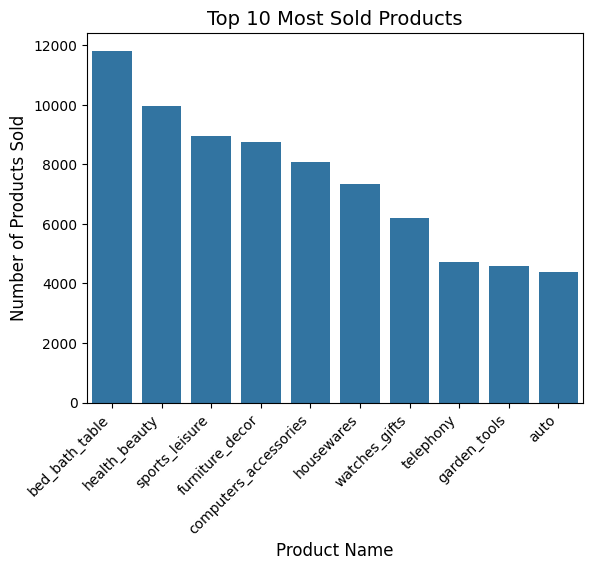

In [31]:
#10 produk paling banyak dibeli
most_product_sold = product_sold.head(10)

sns.barplot(x=most_product_sold.index, y=most_product_sold.values)
plt.xlabel("Product Name", fontsize=12)
plt.ylabel("Number of Products Sold", fontsize=12)
plt.title("Top 10 Most Sold Products", fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.show()

**Insight:**
- Dari 71 produk terjual, diketahui 10 produk dengan transaksi penjualan terbanyak adalah bed_bath_table

### 2. Berapa besar rata-rata transaksi yang dilakukan oleh setiap customer dalam sekali belanja?

In [32]:
cust_buy_summary = data.groupby("customer_id")["price"].sum().reset_index()
cust_buy_summary['price'].describe()

,price
count,97255.000000
mean,144.080143
std,240.990583
min,0.850000
25%,47.490000
50%,89.000000
75%,154.900000
max,13440.000000


**Insight:**
- Dari deskripsi di atas, diketahui bahwa rata-rata transaksi yang dilakukan oleh customer dalam satu kali belanja adalah seharga 143,2.
- Diketahui pula pembelanjaan tertinggi dalam sekali transaksi adalah seharga 13440.

### 3. Metode payment apakah yang biasanya digunakan oleh customer?

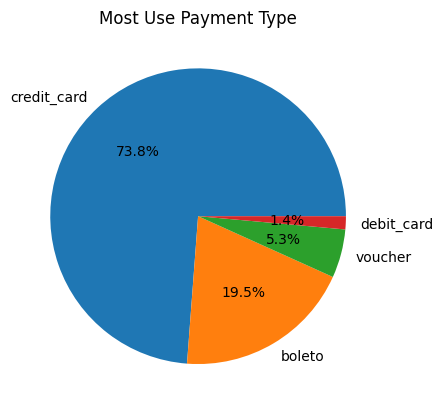

In [33]:
data.groupby("customer_id")["payment_type"].sum().reset_index()
payment_counts = data["payment_type"].value_counts()

plt.pie(payment_counts, labels=payment_counts.index, autopct="%1.1f%%")
plt.title("Most Use Payment Type")
plt.show()

**Insight:**
- Dari visualisasi pie chart di atas, diketahui bahwa jenis pembayaran paling sering digunakan adalah dengan kartu kredit dengan persentase sebesar 73,8% atau kurang lebih ada 70190 transaksi.
- Metode pembayaran yang paling sedikit digunakan adalah kartu debit dengan persentase sebesar 1,4% atau kurang lebih terdapat 1331 transaksi.

### Informasi Tambahan

In [34]:
data['customer_id'].value_counts().head(3)

,count
customer_id,
270c23a11d024a44c896d1894b261a83,63
13aa59158da63ba0e93ec6ac2c07aacb,38
9af2372a1e49340278e7c1ef8d749f34,29


In [35]:
most_cust = data[data['customer_id'] == '270c23a11d024a44c896d1894b261a83']
most_cust_summary = most_cust.groupby("product_category_name_english")["price"].sum().reset_index()
most_cust_summary

,product_category_name_english,price
0,bed_bath_table,545.58
1,housewares,1759.80


**Insight:**
- Dari hasil analisa sebelumnya, diketahui bahwa customer yang paling banyak melakukan transaksi dalam satu kali belanja adalah customer dengan ID: 270c23a11d024a44c896d1894b261a83.
- Total belanjaan customer tersebut adalah sebanyak 63 produk.
- Total harga yang dibayarkan adalah 2305,38.

## Analisis Association Rules



In [36]:
merge_list = data.groupby('customer_id')['product_category_name_english'].apply(list).reset_index()
merge_list.head()

,customer_id,product_category_name_english
0,00012a2ce6f8dcda20d059ce98491703,[toys]
1,000161a058600d5901f007fab4c27140,[health_beauty]
2,0001fd6190edaaf884bcaf3d49edf079,[baby]
3,0002414f95344307404f0ace7a26f1d5,[cool_stuff]
4,000379cdec625522490c315e70c7a9fb,[bed_bath_table]


In [37]:
mlb = MultiLabelBinarizer()
df = pd.DataFrame(mlb.fit_transform(merge_list['product_category_name_english']), columns=mlb.classes_)
df

,agro_industry_and_commerce,air_conditioning,art,arts_and_craftmanship,audio,auto,baby,bed_bath_table,books_general_interest,books_imported,...,security_and_services,signaling_and_security,small_appliances,small_appliances_home_oven_and_coffee,sports_leisure,stationery,tablets_printing_image,telephony,toys,watches_gifts
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97250,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
97251,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
97252,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
97253,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


Association Rules

In [38]:
apriori_frequent_itemsets = apriori(df, min_support = 0.0002 , use_colnames = True)

/usr/local/lib/python3.11/dist-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [39]:
rules = association_rules(apriori_frequent_itemsets, metric ='confidence', min_threshold=0.0002)

In [40]:
rules = rules.sort_values(by=["confidence", "lift"], ascending=False)

In [41]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
4,(home_confort),(bed_bath_table),0.004082,0.096828,0.000442,0.108312,1.118606,1.0,0.000047,1.012879,0.106465,0.004401,0.012716,0.056439
2,(furniture_decor),(bed_bath_table),0.066310,0.096828,0.000720,0.010854,0.112100,1.0,-0.005701,0.913083,-0.894550,0.004432,-0.095191,0.009144
3,(bed_bath_table),(furniture_decor),0.096828,0.066310,0.000720,0.007433,0.112100,1.0,-0.005701,0.940682,-0.897644,0.004432,-0.063058,0.009144
0,(baby),(cool_stuff),0.029664,0.037345,0.000206,0.006932,0.185631,1.0,-0.000902,0.969375,-0.818878,0.003078,-0.031593,0.006220
1,(cool_stuff),(baby),0.037345,0.029664,0.000206,0.005507,0.185631,1.0,-0.000902,0.975709,-0.820054,0.003078,-0.024896,0.006220
5,(bed_bath_table),(home_confort),0.096828,0.004082,0.000442,0.004566,1.118606,1.0,0.000047,1.000486,0.117398,0.004401,0.000486,0.056439
9,(housewares),(furniture_decor),0.060501,0.066310,0.000247,0.004079,0.061512,1.0,-0.003765,0.937514,-0.941994,0.001950,-0.066651,0.003900
8,(furniture_decor),(housewares),0.066310,0.060501,0.000247,0.003722,0.061512,1.0,-0.003765,0.943009,-0.942332,0.001950,-0.060436,0.003900
6,(housewares),(bed_bath_table),0.060501,0.096828,0.000206,0.003399,0.035104,1.0,-0.005653,0.906252,-0.966950,0.001309,-0.103445,0.002761
7,(bed_bath_table),(housewares),0.096828,0.060501,0.000206,0.002124,0.035104,1.0,-0.005653,0.941499,-0.968187,0.001309,-0.062136,0.002761


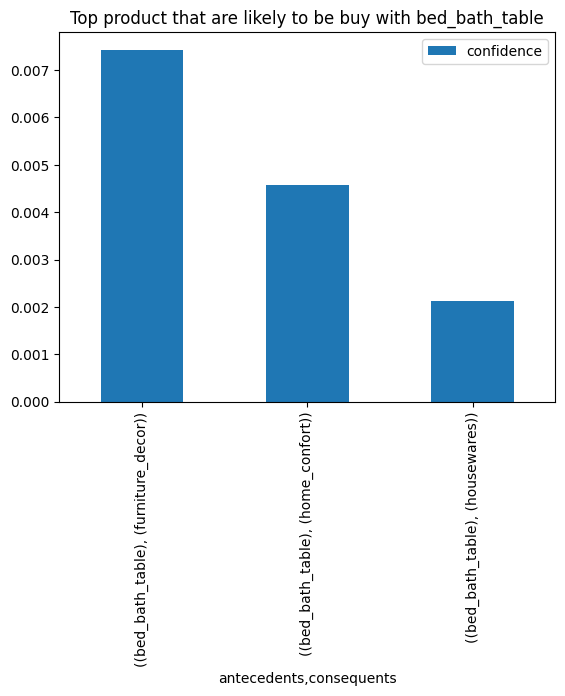

In [42]:
rules[rules["antecedents"].apply(lambda x: "bed_bath_table" in str(x))].groupby(
    ['antecedents', 'consequents'])[['confidence']].max().sort_values(ascending=True, by='confidence').head(10).plot(kind='bar').invert_xaxis()
plt.title('Top product that are likely to be buy with bed_bath_table');

**Insight:**
Dari analisis association rules di atas dapat diperoleh informasi mengenai produk-produk yang juga dibeli bersamaan dengan bed_bath_table:
- bed_bath_table => furniture_decor: dari semua customer yang membeli bed bath table maka akan ada sekitar 0,75% orang yang juga membeli furniture_decor.
- bed_bath_table => home_confort: dari semua customer yang membeli bed bath table maka akan ada sekitar 0,46% orang yang juga membeli home_confort.
- bed_bath_table => housewarness: dari semua customer yang membeli bed bath table maka akan ada sekitar 0,22% orang yang juga membeli housewarness.

## Conclusion

1. Produk apakah yang sering dibeli?
Dari hasil analisa sebelumnya diketahui produk yang sering dibeli oleh customer adalah bed_bath_table dengan banyaknya transaksi adalah sebesar 11649.

2. Berapa besar rata-rata transaksi yang dilakukan oleh setiap customer dalam sekali belanja?
Diketahui bahwa rata-rata transaksi yang dilakukan oleh customer dalam satu kali belanja adalah seharga 143,2.

3. Metode payment apakah yang biasanya digunakan oleh customer?
Dari analisa sebelumnya, diketahui bahwa jenis pembayaran paling sering digunakan adalah dengan kartu kredit dengan persentase sebesar 73,8% atau kurang lebih ada 70190 transaksi.

4. Produk apakah yang biasanya dibeli secara bersamaan?
Dari analisis association rules di atas dapat diperoleh informasi mengenai produk-produk yang juga dibeli bersamaan dengan bed_bath_table adalah furniture_decor, home_confort, dan housewarness.

Kesimpulan tersebut dapat digunakan untuk menyusun strategi dalam meningkatkan penjualan.
- Evaluasi produk yang jarang dibeli
- Memberikan fasilitas lebih untuk customer yang sering melakukan transaksi pembelian seperti diskon member atau giveaway
- Melakukan pairing produk yang sering dibeli bersamaan